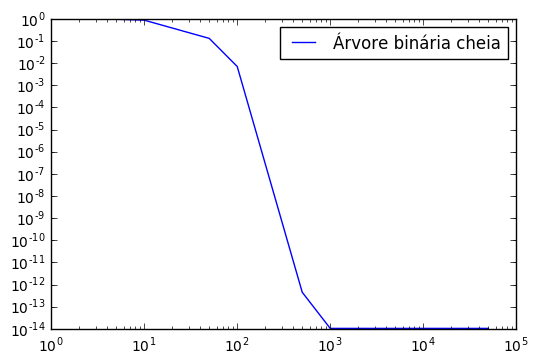

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 15 21:42:14 2018

@author: rodrigoazs
"""

import numpy as np
import random
import math
import matplotlib.pyplot as plt

#def tree(h):
h = 9
n = np.array([2**i for i in range(h+1)]).sum()

edges = n - 1        
pi_stacionary = ([3] * n) / (2*edges)

n_only_1_edge = 2**h - 1
pi_stacionary[0] = 2 / (2*edges)

for i in range(n_only_1_edge, len(pi_stacionary)):
    pi_stacionary[i] = 1 / (2*edges)

plots = []
for i in range(10):
    plots.append(int(10**i))
    plots.append(int(1/2 * 10**i))

P = np.zeros((n, n))
for i in range(n):
    P[i][i] = 0.5
for i in range(n):
    left = 2*i + 1
    right = 2*i + 2
    parent = math.floor((i-1)/2)
    transitions = []
    if left < n:
        transitions.append(left)
        transitions.append(right)
    if parent >= 0:
        transitions.append(parent)
    for t in transitions:
        P[i][t] = 0.5 / len(transitions)

P = np.matrix(P)

pi_estimate = [0] * n

X_arvore = []
y_arvore = []
# random walk
pi_0 = 0 #random.randint(0, n-1)
pi_estimate[0] = 1

pi_estimate = np.matrix(pi_estimate)
for i in range(50000):
    pi_estimate = pi_estimate * P
    # estimate
    #a = np.array(pi_e)/(i+1)
    if (i+2) in plots:
        #variancia = 0
        #for t in range(len(pi_estimate)):
        #    print(pi_estimate[t])
        #    variancia += abs(pi_estimate[t]/(i+1) - pi_stacionary[t]) / 2
        #variancia = np.array(pi_estimate) / (i+2)
        #variancia = sum(abs(variancia - pi_stacionary))/2
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        X_arvore.append(i+2)
        y_arvore.append(variancia)

plt.loglog(X_arvore, y_arvore, label='Árvore binária cheia')
plt.legend()
plt.show()